# Kinetic Mixing Constraints

This notebook contains the constraints on the kinetic mixing model in `Hazma` from future telescopes.

## Computing the constraints

In [3]:
%load_ext autoreload
%autoreload 2
from constraints import Constraints
import numpy as np
import pickle

In [4]:
n = 150
mxs = np.geomspace(1, 250, n)
mvs = 3 * mxs
c = Constraints(mxs[0], mvs[0], 1.0, 1e-3)

In [ ]:
constraints = c.compute_telescope_constraints(mxs, mvs)

In [ ]:
constraints.update(c.compute_pheno_constraints(mxs, mvs))
constraints['relic_density'] = c.compute_relic_density_contours(mxs, mvs)
constraints['cmb'] = c.compute_cmb_constraints(mxs, mvs)

In [21]:
constraints['mx'] = mxs
constraints['mv'] = mvs
# Save it
with open('data/constraints.p', 'wb') as f:
    pickle.dump(constraints, f)

## Plots

In [22]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load constraints
with open('data/constraints.p', 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

# Condense the pheno constraints
df['other'] = np.min([df['babar'],df['lsnd'],df['e137']], axis=0)
# Condense the old telescopes
df['past_telescopes'] = np.min([df['comptel'],df['egret'],df['fermi'],df['integral']], axis=0)
df_condensed = df.drop(['babar','lsnd','e137','comptel','fermi','egret','integral'],axis=1)

In [24]:
fig_dim = 4
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


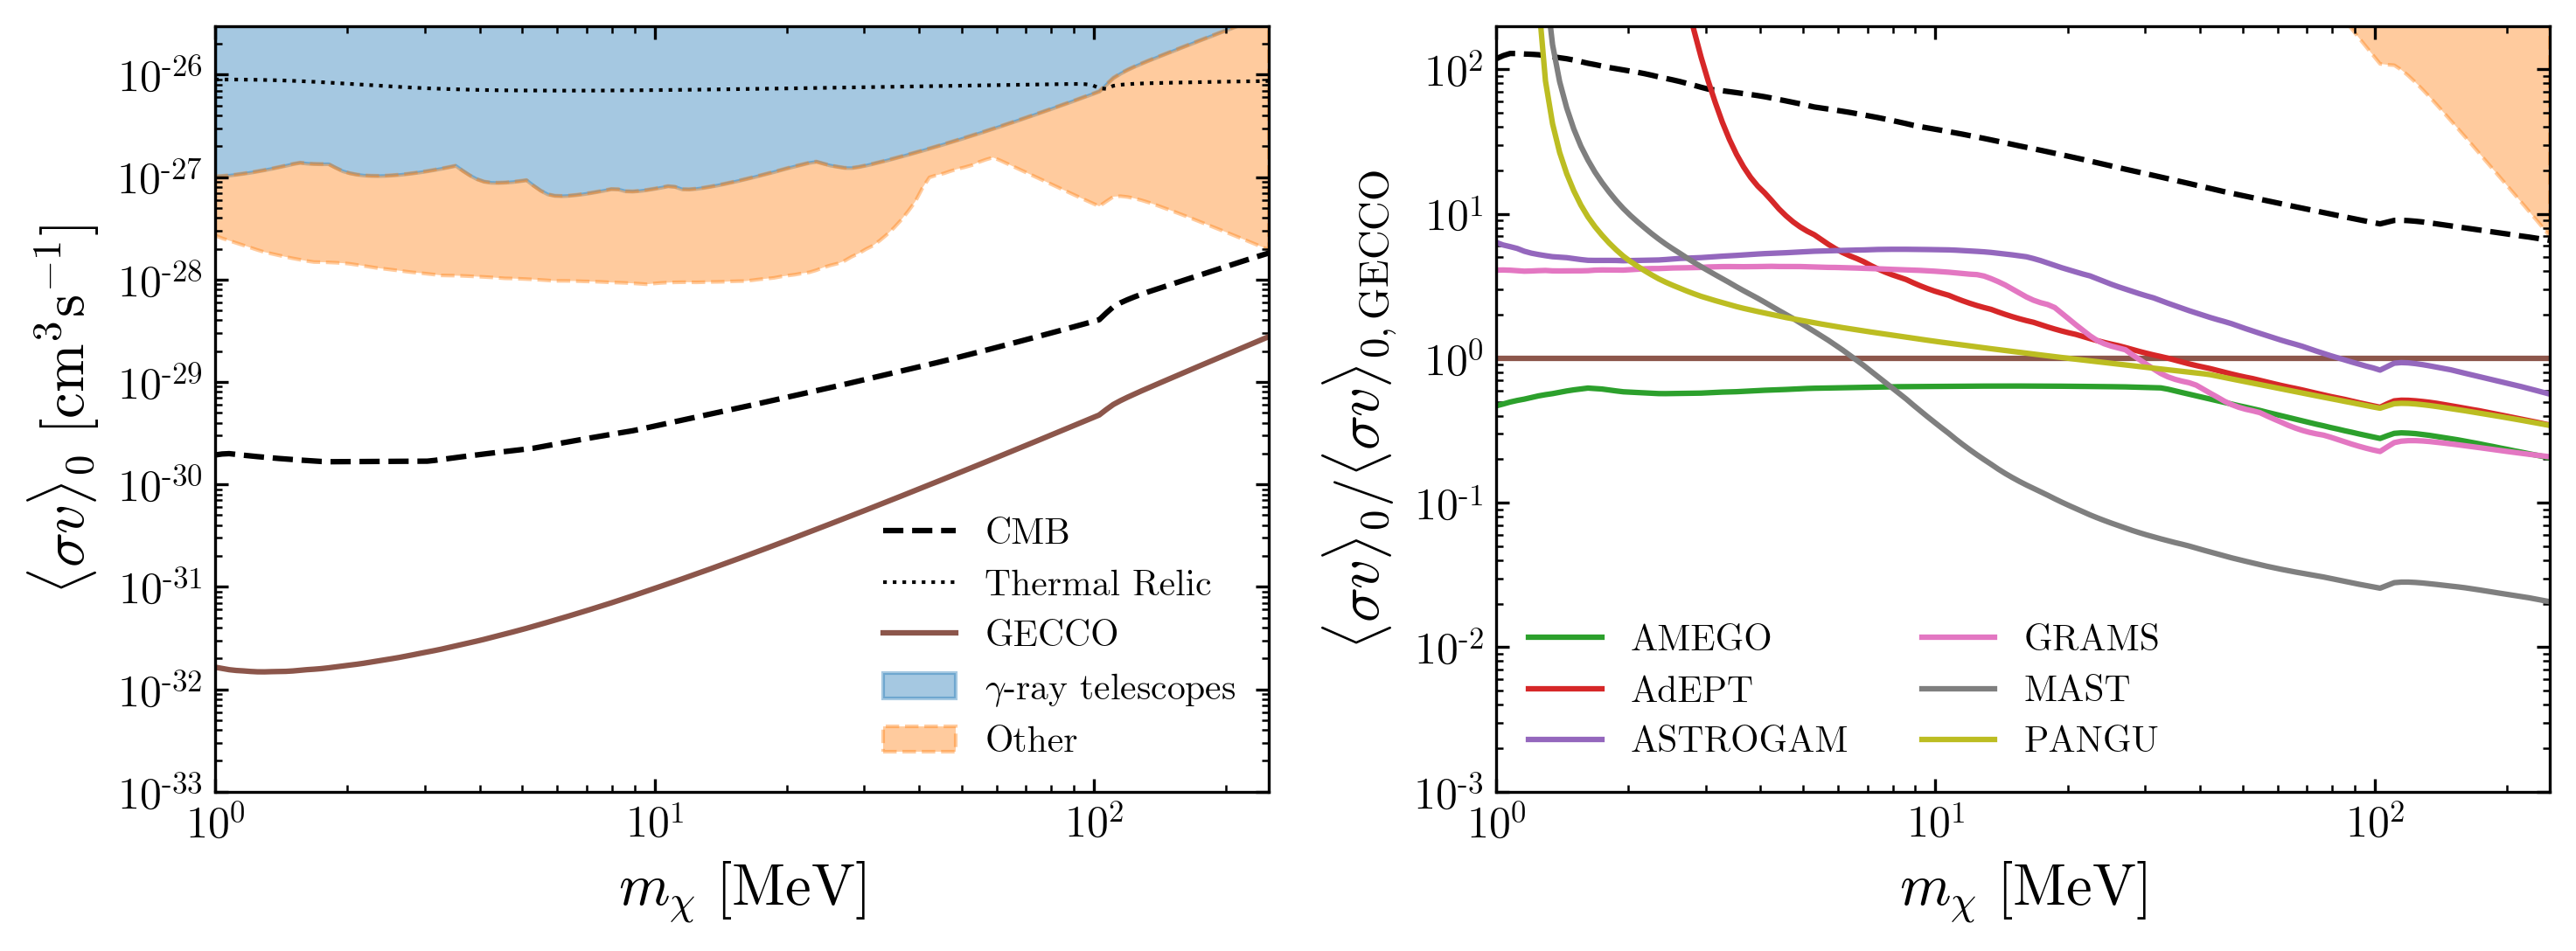

In [41]:
fig, axes = plt.subplots(1, 2, dpi=150, figsize=(10, 3.8))

ymin, ymax = [1e-33, 3e-26]

for i, (ax, rescaling) in enumerate(zip(axes, [1, df_condensed["gecco"]])):
    ax.plot(
        df_condensed['mx'], 
        df_condensed['cmb'] / rescaling, 
        label=r'CMB' if i == 0 else None,
        linestyle="--",
        color="black",
    )

    ax.plot(
        df_condensed['mx'], 
        df_condensed['relic_density'] / rescaling, 
        label=r'Thermal Relic' if i == 0 else None,
        linestyle=":",
        color="black",
        linewidth=1,
    )

    ax.fill_between(
        df_condensed['mx'], 
        df_condensed['past_telescopes'] / rescaling, 
        ymax / rescaling, 
        label=r'$\gamma$-ray telescopes' if i == 0 else None,
        linestyle="-",
        color=colors[0],
        alpha=0.4
    )

    ax.fill_between(
        df_condensed['mx'], 
        df_condensed['other'] / rescaling, 
        df_condensed['past_telescopes'] / rescaling, 
        label=r'Other' if i == 0 else None,
        linestyle="--",
        color=colors[1],
        alpha=0.4
    )
    ax.plot(
        df_condensed['mx'],     
        df_condensed['gecco'] / rescaling,  
        label='GECCO' if i == 0 else None,
        linestyle="-",
        color=colors[5],
    )

    if i == 1:
        ax.plot(
            df_condensed['mx'],     
            df_condensed['amego'] / rescaling,  
            label='AMEGO',
            linestyle="-",
            color=colors[2],
        )
        ax.plot(
            df_condensed['mx'],     
            df_condensed['adept'] / rescaling,  
            label='AdEPT',
            linestyle="-",
            color=colors[3],
        )
        ax.plot(
            df_condensed['mx'],     
            df_condensed['all-sky astrogam'] / rescaling,  
            label='ASTROGAM',
            linestyle="-",
            color=colors[4],
        )
        ax.plot(
            df_condensed['mx'],     
            df_condensed['grams'] / rescaling,  
            label='GRAMS',
            linestyle="-",
            color=colors[6],
        )
        ax.plot(
            df_condensed['mx'],     
            df_condensed['mast'] / rescaling,  
            label='MAST',
            linestyle="-",
            color=colors[7],
        )
        ax.plot(
            df_condensed['mx'],     
            df_condensed['pangu'] / rescaling,  
            label='PANGU',
            linestyle="-",
            color=colors[8],
        )

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([np.min(df_condensed['mx']), np.max(df_condensed['mx'])])
    if i == 0:
        ax.set_ylim([ymin, ymax])
    else:
        ax.set_ylim(0.001, 200)
    ax.set_xlabel(r'$m_{\chi} \ [\mathrm{MeV}]$', fontsize=16)
    if i == 0:
        ax.set_ylabel(r'$\langle\sigma v\rangle_{0} \ [\mathrm{cm}^3\mathrm{s}^{-1}]$', fontsize=16)
    else:
        ax.set_ylabel(
            r'$\langle\sigma v\rangle_{0} / \langle\sigma v\rangle_{0,\mathrm{GECCO}}$',
            fontsize=16
        )
    ax.tick_params("both", top=True, right=True, which="both", direction="in")

axes[0].legend(fontsize=10, loc="lower right", frameon=False)
axes[1].legend(fontsize=10, ncol=2, frameon=False)

fig.tight_layout()
fig.savefig('figures/kinetic_mixing.pdf')